In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_5957/2120952718.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-04-18 19:45:42.001138: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-18 19:45:42.111884: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-18 19:45:

## DATA

In [2]:
stock_AAPL_df = pd.read_csv('./data/AAPL.csv')

In [3]:
stock_AAPL_df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2019-04-08 00:00:00+00:00,200.10,200.23,196.34,196.42,25881697,48.157508,48.188795,47.252599,47.271853,103526788,0.0,1.0
1,AAPL,2019-04-09 00:00:00+00:00,199.50,202.85,199.23,200.32,35768237,48.013108,48.819343,47.948128,48.210455,143072948,0.0,1.0
2,AAPL,2019-04-10 00:00:00+00:00,200.62,200.74,198.18,198.68,21695288,48.282655,48.311535,47.695427,47.815761,86781152,0.0,1.0
3,AAPL,2019-04-11 00:00:00+00:00,198.95,201.00,198.44,200.85,20900808,47.880741,48.374109,47.758001,48.338009,83603232,0.0,1.0
4,AAPL,2019-04-12 00:00:00+00:00,198.87,200.14,196.21,199.20,27760668,47.861487,48.167135,47.221313,47.940908,111042672,0.0,1.0


In [4]:
stock_AAPL_df[['year', 'month', 'day']] = stock_AAPL_df['date'].str.split('-', expand=True)
stock_AAPL_df['day'] = stock_AAPL_df['day'].str.split(' ', expand=True)[0]
# stock_AAPL_df['day'].str.split(' ', expand=True)[0]

In [5]:
train_stock_df = stock_AAPL_df[stock_AAPL_df['year'] != '2024']
train_stock_df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,year,month,day
0,AAPL,2019-04-08 00:00:00+00:00,200.10,200.23,196.340,196.42,25881697,48.157508,48.188795,47.252599,47.271853,103526788,0.0,1.0,2019,04,08
1,AAPL,2019-04-09 00:00:00+00:00,199.50,202.85,199.230,200.32,35768237,48.013108,48.819343,47.948128,48.210455,143072948,0.0,1.0,2019,04,09
2,AAPL,2019-04-10 00:00:00+00:00,200.62,200.74,198.180,198.68,21695288,48.282655,48.311535,47.695427,47.815761,86781152,0.0,1.0,2019,04,10
3,AAPL,2019-04-11 00:00:00+00:00,198.95,201.00,198.440,200.85,20900808,47.880741,48.374109,47.758001,48.338009,83603232,0.0,1.0,2019,04,11
4,AAPL,2019-04-12 00:00:00+00:00,198.87,200.14,196.210,199.20,27760668,47.861487,48.167135,47.221313,47.940908,111042672,0.0,1.0,2019,04,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,AAPL,2023-12-22 00:00:00+00:00,193.60,195.41,192.970,195.18,37149570,193.354276,195.161978,192.725075,194.932270,37149570,0.0,1.0,2023,12,22
1188,AAPL,2023-12-26 00:00:00+00:00,193.05,193.89,192.830,193.61,28919310,192.804974,193.643908,192.585253,193.364263,28919310,0.0,1.0,2023,12,26
1189,AAPL,2023-12-27 00:00:00+00:00,193.15,193.50,191.090,192.49,47899806,192.904847,193.254403,190.847462,192.245685,47899806,0.0,1.0,2023,12,27
1190,AAPL,2023-12-28 00:00:00+00:00,193.58,194.66,193.170,194.14,34049898,193.334301,194.412930,192.924822,193.893590,34049898,0.0,1.0,2023,12,28


In [6]:
test_stock_df =  stock_AAPL_df[stock_AAPL_df['year'] == '2024']
test_stock_df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,year,month,day
1192,AAPL,2024-01-02 00:00:00+00:00,185.64,188.4400,183.8850,187.150,82488674,185.404379,188.200825,183.651606,186.912462,82488674,0.0,1.0,2024,01,02
1193,AAPL,2024-01-03 00:00:00+00:00,184.25,185.8800,183.4300,184.220,58414460,184.016143,185.644074,183.197184,183.986181,58414460,0.0,1.0,2024,01,03
1194,AAPL,2024-01-04 00:00:00+00:00,181.91,183.0872,180.8800,182.150,71983570,181.679113,182.854819,180.650420,181.918809,71983570,0.0,1.0,2024,01,04
1195,AAPL,2024-01-05 00:00:00+00:00,181.18,182.7600,180.1700,181.990,62196924,180.950040,182.528034,179.941322,181.759012,62196924,0.0,1.0,2024,01,05
1196,AAPL,2024-01-08 00:00:00+00:00,185.56,185.6000,181.5000,182.085,59144470,185.324480,185.364430,181.269634,181.853891,59144470,0.0,1.0,2024,01,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,AAPL,2024-04-01 00:00:00+00:00,170.03,171.2500,169.4750,171.190,43772506,170.030000,171.250000,169.475000,171.190000,43772506,0.0,1.0,2024,04,01
1254,AAPL,2024-04-02 00:00:00+00:00,168.84,169.3400,168.2302,169.080,49013991,168.840000,169.340000,168.230200,169.080000,49013991,0.0,1.0,2024,04,02
1255,AAPL,2024-04-03 00:00:00+00:00,169.65,170.6800,168.5800,168.790,45571129,169.650000,170.680000,168.580000,168.790000,45571129,0.0,1.0,2024,04,03
1256,AAPL,2024-04-04 00:00:00+00:00,168.82,171.9200,168.8200,170.290,53355055,168.820000,171.920000,168.820000,170.290000,53355055,0.0,1.0,2024,04,04


In [7]:
train_data = train_stock_df[['date', 'open']]
train_data['date'] = pd.to_datetime(train_data['date'])
train_data

/tmp/ipykernel_5957/1735575949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['date'] = pd.to_datetime(train_data['date'])


,date,open
0,2019-04-08 00:00:00+00:00,196.42
1,2019-04-09 00:00:00+00:00,200.32
2,2019-04-10 00:00:00+00:00,198.68
3,2019-04-11 00:00:00+00:00,200.85
4,2019-04-12 00:00:00+00:00,199.20
...,...,...
1187,2023-12-22 00:00:00+00:00,195.18
1188,2023-12-26 00:00:00+00:00,193.61
1189,2023-12-27 00:00:00+00:00,192.49
1190,2023-12-28 00:00:00+00:00,194.14


## Data Pre-Processing

In [8]:
training_array = train_data['open'].values
training_array = training_array.reshape((-1, 1))
training_array.shape

(1192, 1)

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))

training_array_scaled = scaler.fit_transform(training_array)

training_array_scaled.shape

(1192, 1)

In [10]:
X_train = []
y_train = []

time_step = 25

for i in range(time_step, len(training_array)):
    X_train.append(training_array_scaled[i-time_step:i].flatten())
    y_train.append(training_array_scaled[i][0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

## Visualise

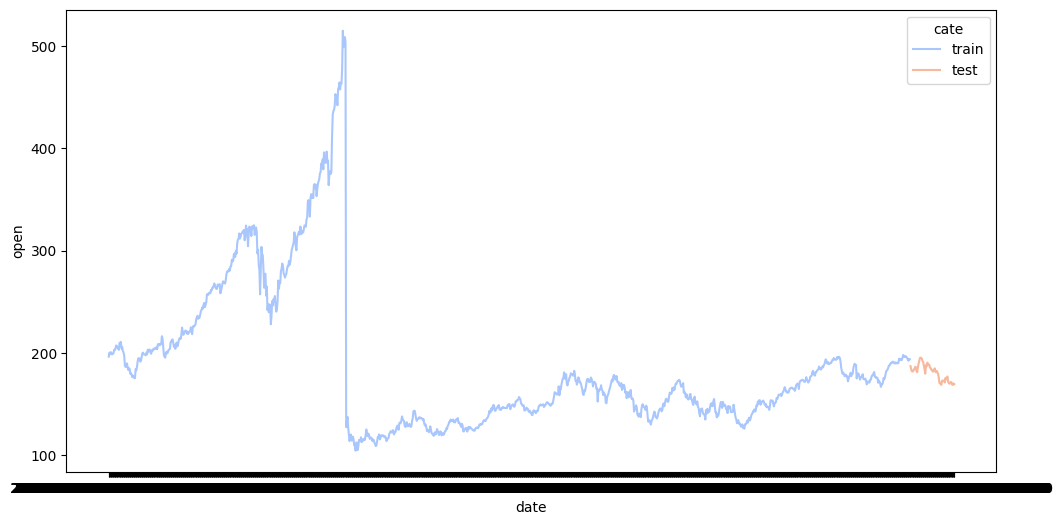

In [11]:
total_df = pd.DataFrame(train_stock_df[['open', 'date']], columns=['open', 'cate', 'date']).replace(np.nan, 'train')
total_df = pd.concat([total_df, test_stock_df[['open', 'date']]]).replace(np.nan, 'test')
total_df

plt.figure(figsize=(12, 6))
sns.lineplot(data=total_df, x='date', y='open', palette='coolwarm', hue='cate')
plt.show()

<Axes: xlabel='date', ylabel='open'>

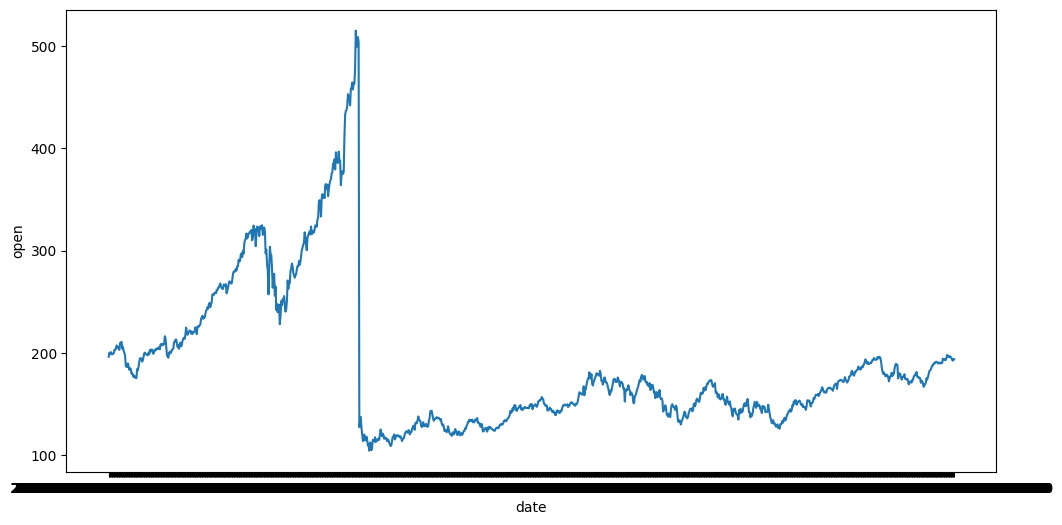

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=train_stock_df, x='date', y='open')

<Axes: xlabel='date', ylabel='open'>

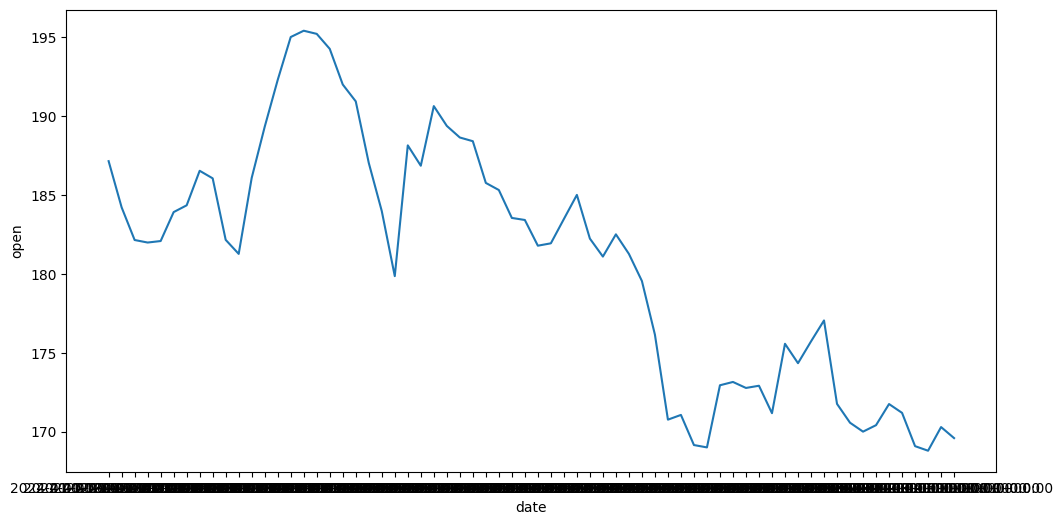

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=test_stock_df, x='date', y='open')

## RNN Model

In [14]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
X_train.shape, y_train.shape

((1167, 25, 1), (1167, 1))

In [15]:
rnn_model = tf.keras.Sequential()
rnn_model.add(tf.keras.layers.SimpleRNN(units=50, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
rnn_model.add(tf.keras.layers.Dropout(0.2))
rnn_model.add(tf.keras.layers.SimpleRNN(units=50, activation='tanh', return_sequences=True))
rnn_model.add(tf.keras.layers.Dropout(0.2))
rnn_model.add(tf.keras.layers.SimpleRNN(units=50, activation='tanh', return_sequences=True))
rnn_model.add(tf.keras.layers.Dropout(0.2))
rnn_model.add(tf.keras.layers.SimpleRNN(units=50))
rnn_model.add(tf.keras.layers.Dropout(0.2))
rnn_model.add(tf.keras.layers.Dense(1))

2024-04-18 19:45:52.019193: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-18 19:45:52.086044: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-18 19:45:52.086241: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [16]:
rnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [17]:
rnn_model.fit(X_train, y_train, epochs=50, batch_size=16)

Epoch 1/50


2024-04-18 19:45:54.839132: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f2ef82efcf0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-18 19:45:54.839152: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-04-18 19:45:54.848525: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-18 19:45:54.872332: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1713449754.947691    7209 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


73/73 [==============================] - 5s 28ms/step - loss: 0.3006 - root_mean_squared_error: 0.5483
Epoch 2/50
73/73 [==============================] - 2s 28ms/step - loss: 0.1363 - root_mean_squared_error: 0.3692
Epoch 3/50
73/73 [==============================] - 2s 28ms/step - loss: 0.0800 - root_mean_squared_error: 0.2828
Epoch 4/50
73/73 [==============================] - 2s 27ms/step - loss: 0.0478 - root_mean_squared_error: 0.2187
Epoch 5/50
73/73 [==============================] - 2s 28ms/step - loss: 0.0360 - root_mean_squared_error: 0.1896
Epoch 6/50
73/73 [==============================] - 2s 27ms/step - loss: 0.0232 - root_mean_squared_error: 0.1522
Epoch 7/50
73/73 [==============================] - 2s 27ms/step - loss: 0.0187 - root_mean_squared_error: 0.1368
Epoch 8/50
73/73 [==============================] - 2s 27ms/step - loss: 0.0159 - root_mean_squared_error: 0.1259
Epoch 9/50
73/73 [==============================] - 2s 28ms/step - loss: 0.0138 - root_mean_squared

## Final Result

In [18]:
import joblib
# Save the model
model_path = './models/rnn_model.pkl'
joblib.dump(rnn_model, model_path)

['./models/rnn_model.pkl']

In [19]:
y_pred = rnn_model.predict(X_train)
y_pred = scaler.inverse_transform(y_pred)
y_pred

37/37 [==============================] - 1s 6ms/step


array([[191.97461],
       [189.19984],
       [185.85376],
       ...,
       [195.87653],
       [194.69269],
       [195.00064]], dtype=float32)

In [20]:
y_test = scaler.inverse_transform(y_train)
y_test.shape
y_test

array([[186.41],
       [186.27],
       [189.91],
       ...,
       [192.49],
       [194.14],
       [193.9 ]])

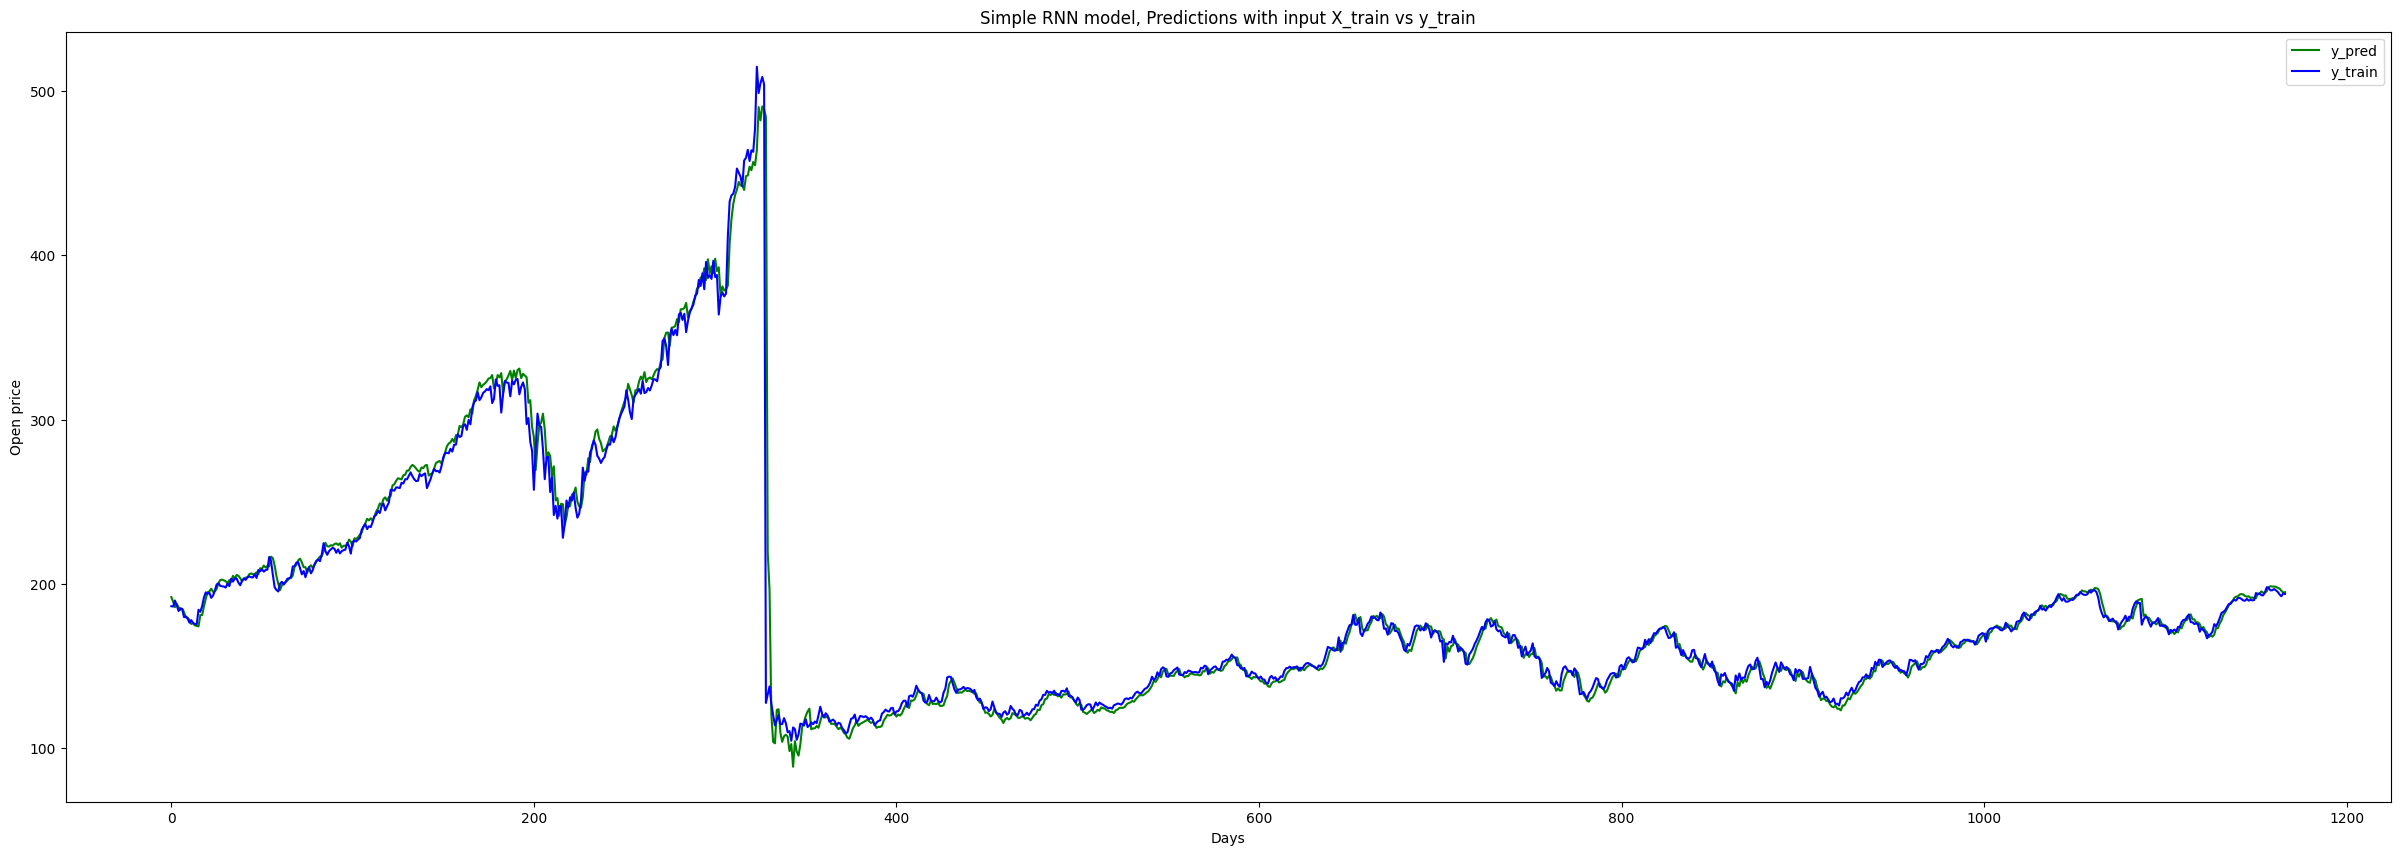

In [21]:
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "g", label = "y_pred" )
plt.plot(y_test, color = "blue", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()


In [22]:
test_data = test_stock_df[['date', 'open']]
test_data['date'] = pd.to_datetime(test_data['date'])
test_data

/tmp/ipykernel_5957/3179668811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['date'] = pd.to_datetime(test_data['date'])


,date,open
1192,2024-01-02 00:00:00+00:00,187.150
1193,2024-01-03 00:00:00+00:00,184.220
1194,2024-01-04 00:00:00+00:00,182.150
1195,2024-01-05 00:00:00+00:00,181.990
1196,2024-01-08 00:00:00+00:00,182.085
...,...,...
1253,2024-04-01 00:00:00+00:00,171.190
1254,2024-04-02 00:00:00+00:00,169.080
1255,2024-04-03 00:00:00+00:00,168.790
1256,2024-04-04 00:00:00+00:00,170.290


In [23]:
testing_array = test_data['open'].values
testing_array = testing_array.reshape((-1, 1))
testing_array.shape

(66, 1)

In [24]:
scaler = MinMaxScaler(feature_range=(0,1))

testing_array_scaled = scaler.fit_transform(testing_array)

testing_array_scaled.shape

(66, 1)

In [25]:
X_test = []
y_test = []

time_step = 25

for i in range(time_step, len(testing_array)):
    X_test.append(testing_array_scaled[i-time_step:i].flatten())
    y_test.append(testing_array_scaled[i])
    
X_test, y_test = np.array(X_test), np.array(y_test)

In [26]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (41, 25)
Shape of y_test before reshape : (41, 1)


In [27]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
y_test = np.reshape(y_test, (-1,1))

In [28]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (41, 25, 1)
Shape of y_test before reshape : (41, 1)


In [29]:
y_pred_test = rnn_model.predict(X_test)
y_pred_test=scaler.inverse_transform(y_pred_test)
print("Shape of y_pred_of_test :",y_pred_test.shape)

2/2 [==============================] - 0s 10ms/step
Shape of y_pred_of_test : (41, 1)


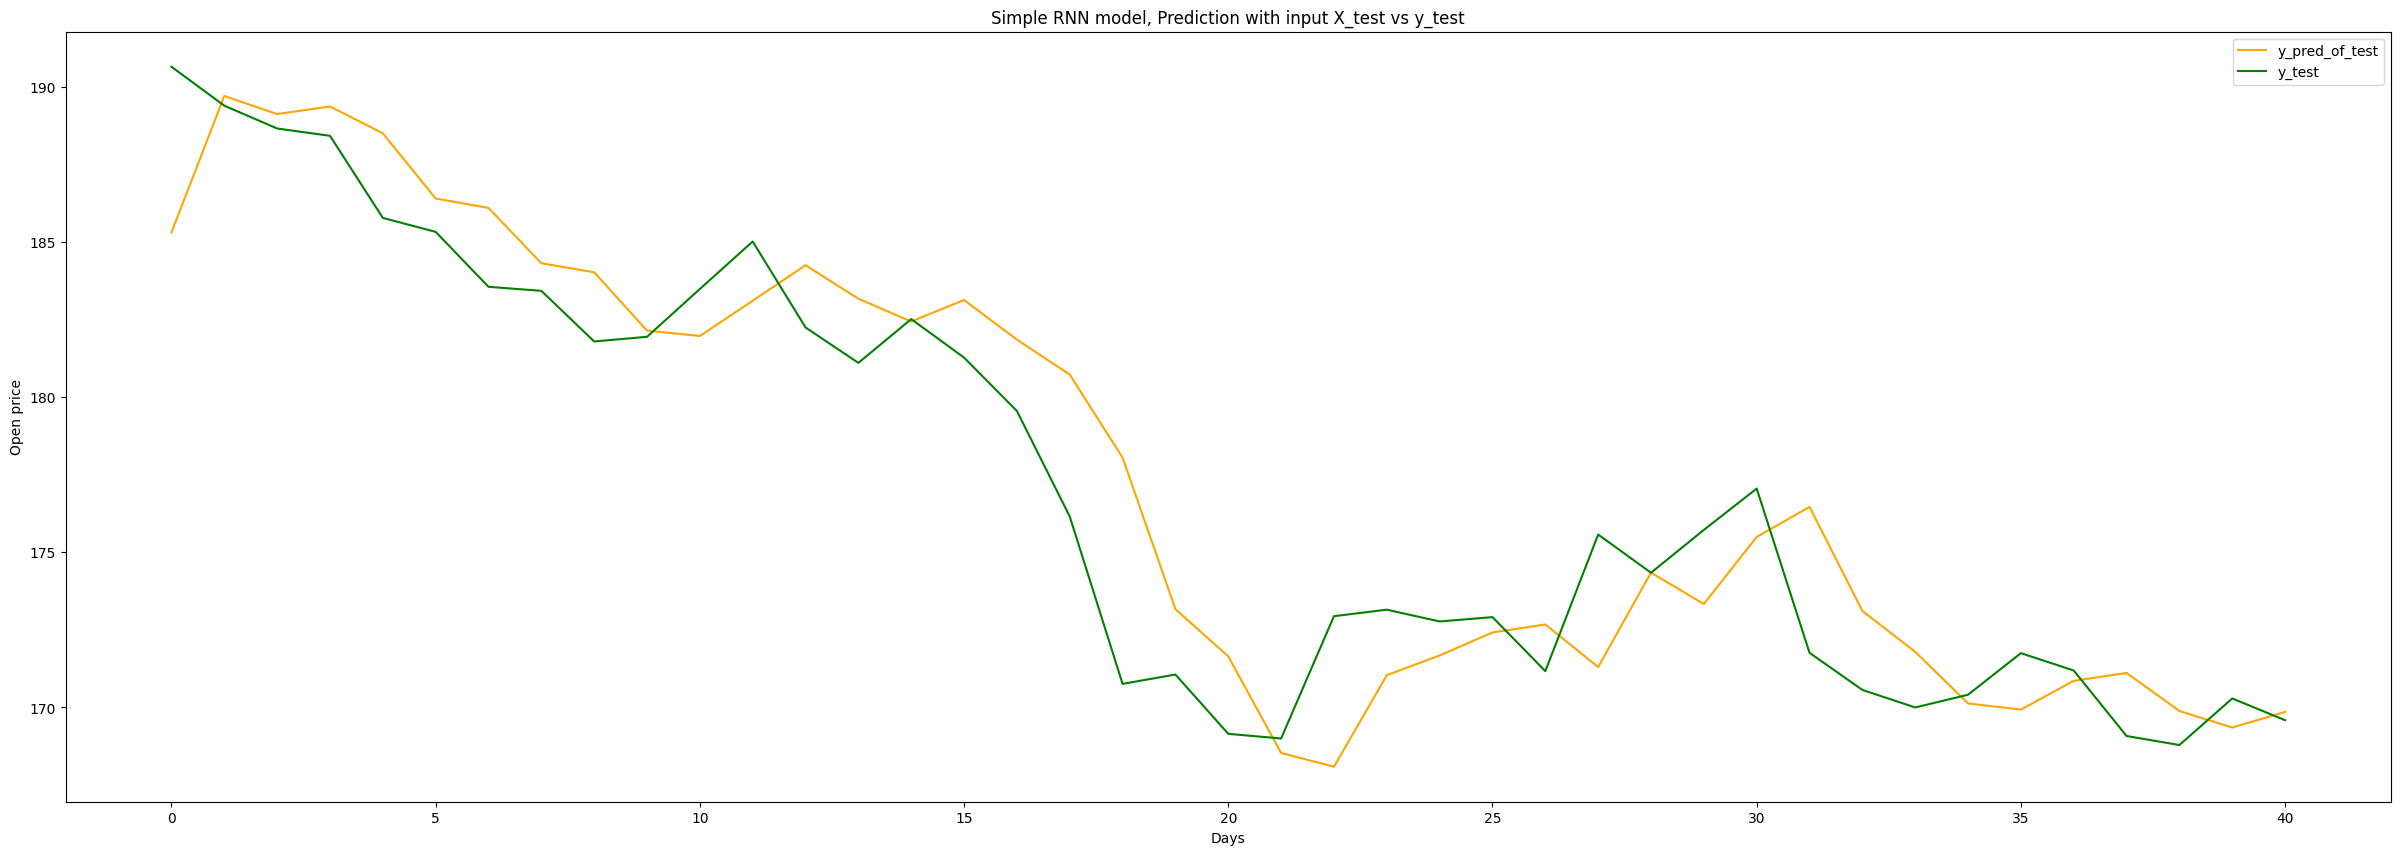

In [30]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()